In [22]:
# Task 4 – Optimization Model for Businee Problem
#date 07-09-2025
# Shaunak Damodar Sinai Kunde
# CODTECH Internship task 4_Optimisation Model
#Optimising IIP and Growth Rate for bottom performing industries in India using Optimisation Model

In [23]:
!pip install pulp

In [24]:
#Cell 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, PULP_CBC_CMD

In [25]:
#Cell 2: Load Dataset
# Load the filtered IIP dataset
file_path = "C://Users//kunde//Desktop//Virtual internship//CodTech IT Solutions Pvt Ltd//CodTech IT Solutions Pvt Ltd Internship//Task-4 Optimisation Model using Data Science//iip_2.xlsx" 
df = pd.read_excel(file_path)

# Show first 5 rows
df.head()

,year,month,type,category,sub_category,index,growth_rate
0,2025,July,General,General,NaN,155.0,3.5
1,2025,July,Sectoral,Mining,NaN,107.7,-7.2
2,2025,July,Sectoral,Manufacturing,Manufacture of Food Products,118.4,-1.3
3,2025,July,Sectoral,Manufacturing,Manufacture of Beverages,105.8,-6.3
4,2025,July,Sectoral,Manufacturing,Manufacture of Tobacco Products,90.1,10.8


In [26]:
df1=df[['index','growth_rate']]
df1.describe()

,index,growth_rate
count,5280.000000,5247.000000
mean,120.916913,2.694435
std,31.720730,15.514329
min,0.200000,-99.900000
25%,102.475000,-2.800000
50%,115.500000,2.900000
75%,132.300000,8.100000
max,296.400000,186.000000


In [27]:
#Cell 3. Data Cleaning
# =========================
# Ensure proper column names
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
print("\nColumns:", df.columns)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Columns: Index(['year', 'month', 'type', 'category', 'sub_category', 'index',
       'growth_rate'],
      dtype='object')

Missing values:
 year               0
month              0
type               0
category           0
sub_category    1600
index              0
growth_rate       33
dtype: int64


C:\Users\kunde\AppData\Local\Temp\ipykernel_3580\1165108184.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_growth, x="growth_rate", y="category", palette="viridis")


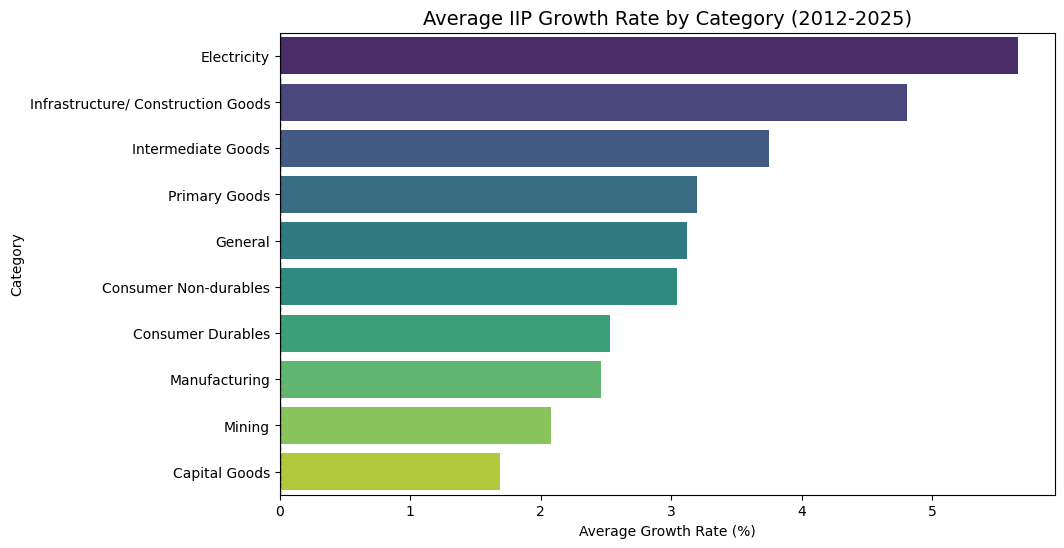

In [28]:
#Cell 4. Data Exploration and Vizualisation
#4.1
plt.figure(figsize=(10,6))

avg_growth = df.groupby("category")["growth_rate"].mean().reset_index()
avg_growth = avg_growth.sort_values("growth_rate", ascending=False)

sns.barplot(data=avg_growth, x="growth_rate", y="category", palette="viridis")
plt.title("Average IIP Growth Rate by Category (2012-2025)", fontsize=14)
plt.xlabel("Average Growth Rate (%)")
plt.ylabel("Category")
plt.axvline(0, color="black", linestyle="--", linewidth=1)  # reference line at 0
plt.show()

C:\Users\kunde\AppData\Local\Temp\ipykernel_3580\3878362976.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="category", y="index", palette="Set2")


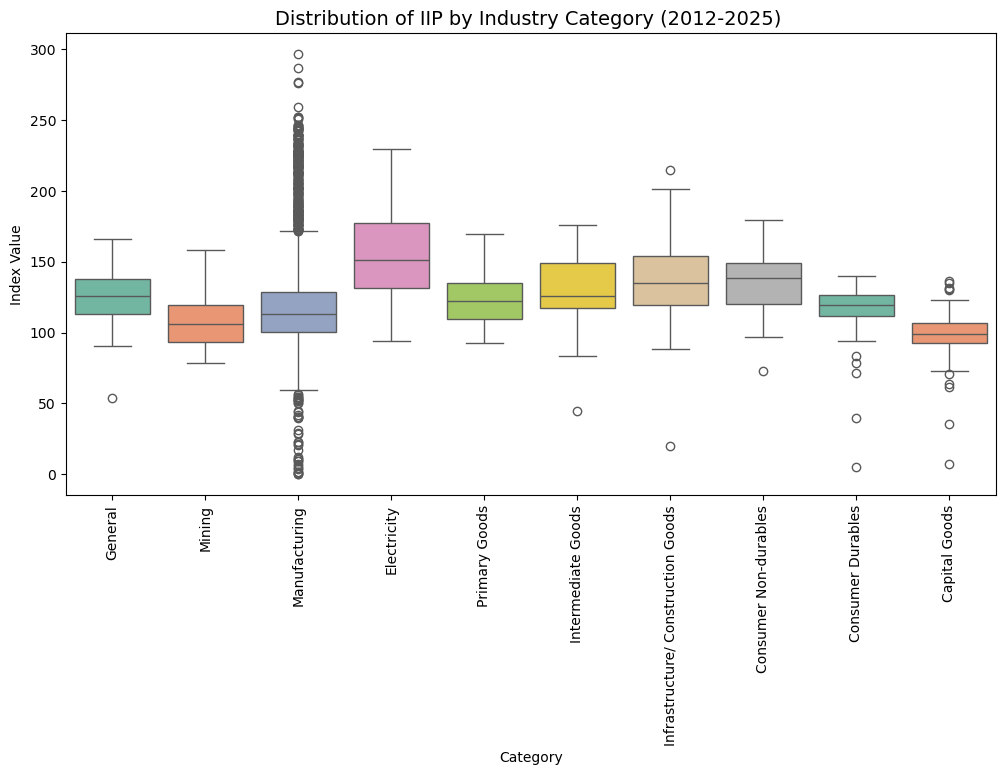

In [29]:
#4.2
plt.figure(figsize=(12,6))

sns.boxplot(data=df, x="category", y="index", palette="Set2")

plt.title("Distribution of IIP by Industry Category (2012-2025) ", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Index Value")
plt.xticks(rotation=90)
plt.show()

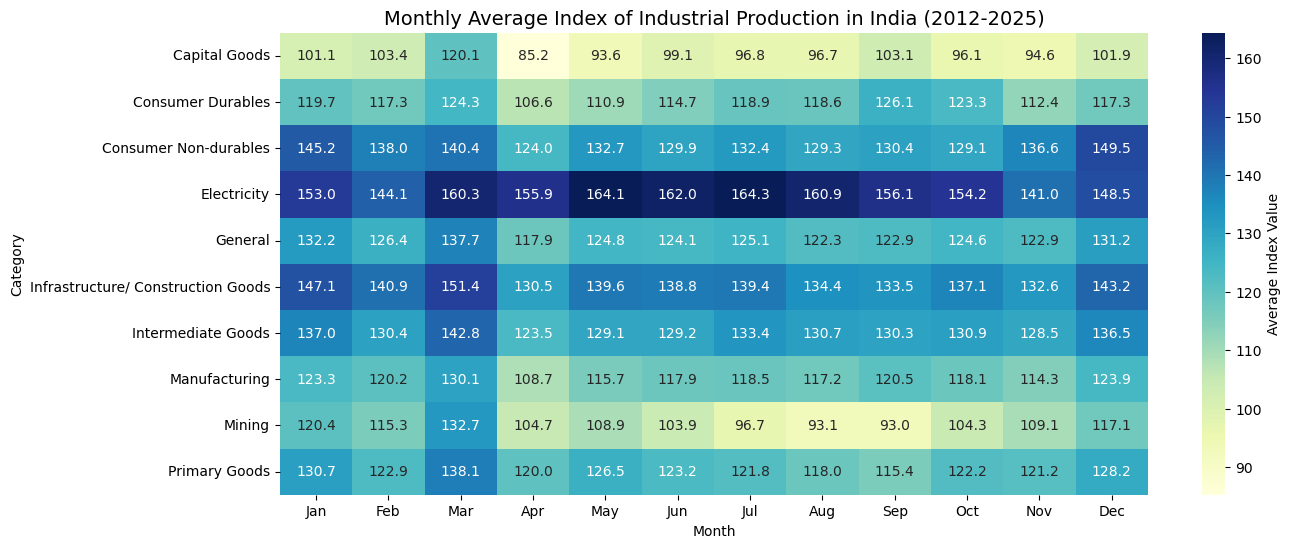

In [30]:
#4.3
import calendar

# Convert month names (like "July") to month numbers
df['month_num'] = df['month'].apply(lambda x: list(calendar.month_name).index(x))

# Map month numbers to short names (Jan, Feb, …)
df['month_name'] = df['month_num'].apply(lambda x: calendar.month_abbr[x])

# Pivot table with month names
pivot_table = df.pivot_table(
    values="index",
    index="category",
    columns="month_name",
    aggfunc="mean"
)

# Reorder columns Jan → Dec
month_order = [calendar.month_abbr[i] for i in range(1, 13)]
pivot_table = pivot_table.reindex(columns=month_order)

plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Average Index Value'})
plt.title("Monthly Average Index of Industrial Production in India (2012-2025)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Category")
plt.show()

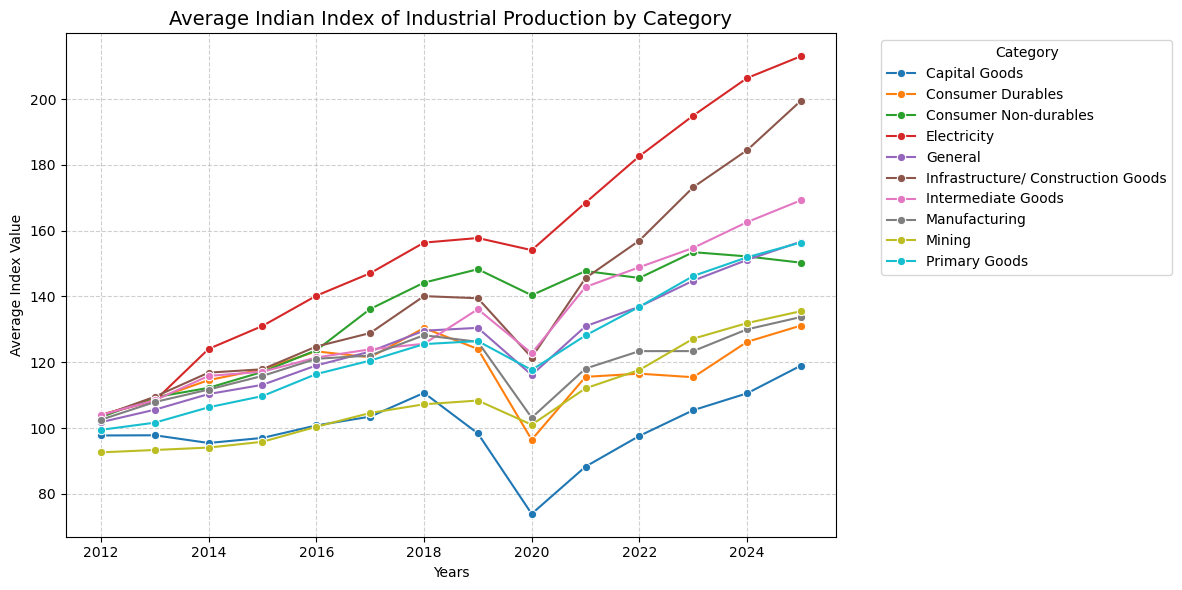

In [31]:
#4.4
# Group by year and category, averaging the index
df_line = df.groupby(["year", "category"])["index"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_line,
    x="year",
    y="index",
    hue="category",
    marker="o"
)

plt.title("Average Indian Index of Industrial Production by Category", fontsize=14)
plt.xlabel("Years")
plt.ylabel("Average Index Value")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

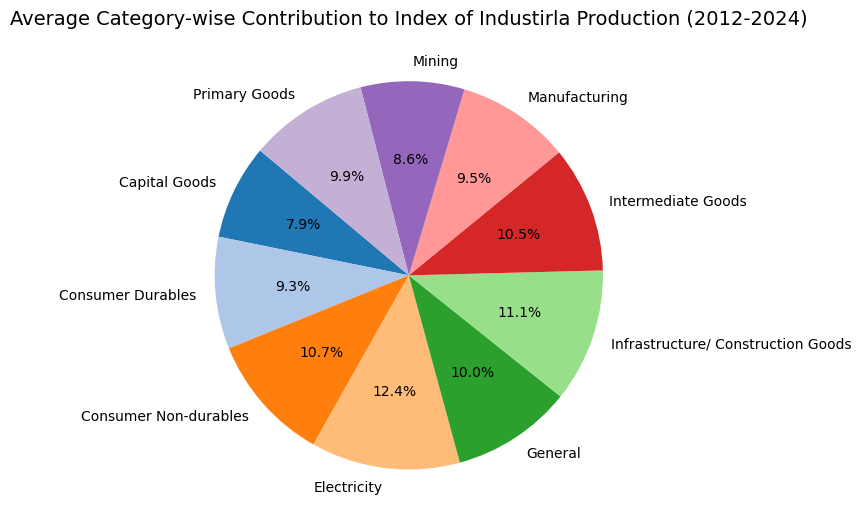

In [32]:
#4.5
# Average index across all years for each category
df_avg = df_line.groupby("category")["index"].mean().reset_index()

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    df_avg["index"],
    labels=df_avg["category"],
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.tab20.colors
)

plt.title("Average Category-wise Contribution to Index of Industirla Production (2012-2024)", fontsize=14)
plt.tight_layout()
plt.show()

In [33]:
# 4.6 Select Negative Growth and Low IIP Items
# Filter sub-categories with index < 100 and growth_rate < 0
filtered = df[(df["index"] < 100) & (df["growth_rate"] < 0)]

# Select only relevant columns for clarity
result = filtered[["sub_category", "index", "growth_rate"]].drop_duplicates()

# Show first 20 rows
print(result.head(20))


                                          sub_category  index  growth_rate
7          Manufacture of Leather and Related Products   98.9         -3.0
9              Manufacture of Paper and Paper Products   79.4         -2.8
10         Printing and Reproduction of Recorded Media   75.4        -10.7
24                                 Other Manufacturing   71.4        -14.3
40         Manufacture of Leather and Related Products   96.2         -3.0
42             Manufacture of Paper and Paper Products   77.3         -3.1
43         Printing and Reproduction of Recorded Media   76.7        -10.1
57                                 Other Manufacturing   61.7        -17.3
73         Manufacture of Leather and Related Products   97.9         -4.6
75             Manufacture of Paper and Paper Products   77.4         -4.4
76         Printing and Reproduction of Recorded Media   77.1        -16.1
83   Manufacture of Fabricated Metal Products, Exce...   97.7         -0.1
90                       

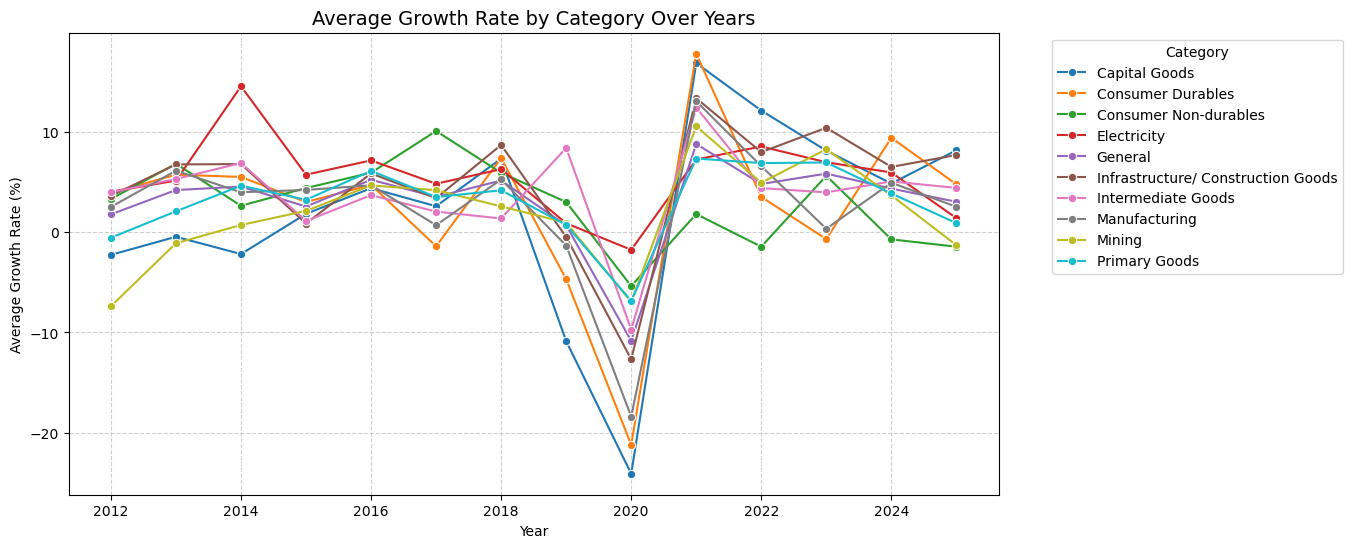

In [34]:
# 4.7 Compute average growth_rate per year for each category
avg_growth = df.groupby(["year", "category"])["growth_rate"].mean().reset_index()

plt.figure(figsize=(12,6))

# Lineplot with different lines for categories
sns.lineplot(
    data=avg_growth,
    x="year",
    y="growth_rate",
    hue="category",
    marker="o"
)

plt.title("Average Growth Rate by Category Over Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Growth Rate (%)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

C:\Users\kunde\AppData\Local\Temp\ipykernel_3580\2982067501.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


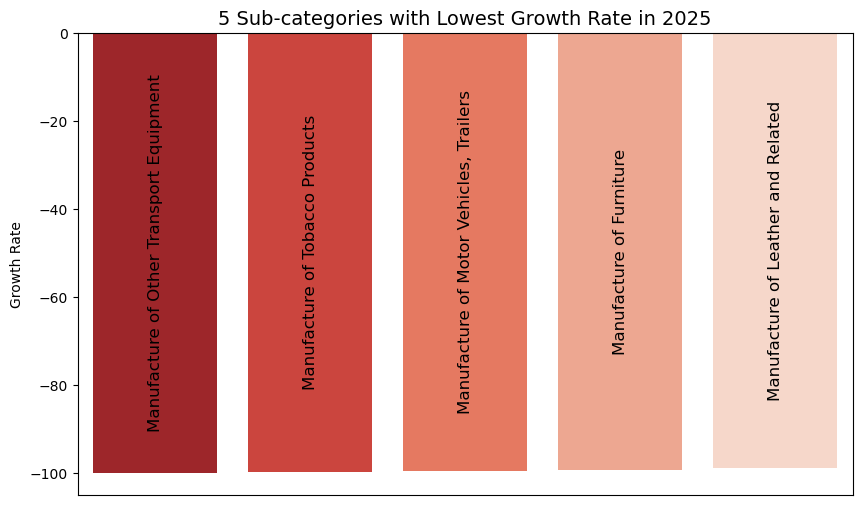

In [35]:
# 4.8 Get 5 sub-categories with lowest growth_rate in 2025
# Filter rows where year = 2025
df_2025 = df[df["year"] == 2025]
# Extract only the growth_rate column for 2025
growth_rate= df_2025["growth_rate"]
lowest5 = df.sort_values("growth_rate").head(5)
lowest5["sub_category_short"] = lowest5["sub_category"].apply(
    lambda x: " ".join(str(x).split()[:5])
)

plt.figure(figsize=(10,6))
bars = sns.barplot(
    data=lowest5.sort_values("growth_rate", ascending=True),
    x="sub_category_short", y="growth_rate", palette="Reds_r"
)

plt.title("5 Sub-categories with Lowest Growth Rate in 2025", fontsize=14)
plt.xlabel(""); plt.ylabel("Growth Rate")

# Put names inside bars
for bar, label in zip(bars.patches, lowest5["sub_category_short"]):
    plt.text(
        bar.get_x() + bar.get_width()/2, bar.get_height()/2,
        label, ha="center", va="center", color="black", fontsize=12,rotation=90
    )

plt.xticks([])  # remove bottom labels
plt.show()

In [46]:
# Cell 5. LP-Based Optimization Function for Bottom 5 Sub-Categories

from pulp import LpProblem, LpMaximize, LpVariable, lpSum, PULP_CBC_CMD

def optimize_bottom5_lp(df, max_index_increase=20, max_growth_increase=20, growth_weight=1.0):
    """
    Optimize Index and Growth Rate for bottom 5 sub-categories using Linear Programming (PuLP).

    Parameters:
    - df: DataFrame with 'sub_category', 'index', 'growth_rate'
    - max_index_increase: maximum increase allowed in Index
    - max_growth_increase: maximum increase allowed in Growth Rate
    - growth_weight: weight factor to include Growth Rate in objective

    Returns:
    - df_opt: DataFrame with optimized Index and Growth Rate
    """
    df_opt = df.copy()

    # Identify bottom 5 performers by growth_rate
    bottom5 = df_opt.sort_values("growth_rate").head(5).copy()
    bottom5_indices = bottom5.index

    # Define LP problem
    prob = LpProblem("Bottom5_IIP_Optimization", LpMaximize)

    # Decision variables
    index_inc = {idx: LpVariable(f"idx_inc_{idx}", lowBound=0, upBound=max_index_increase)
                 for idx in bottom5_indices}
    growth_inc = {idx: LpVariable(f"gr_inc_{idx}", lowBound=0, upBound=max_growth_increase)
                  for idx in bottom5_indices}

    # Objective: maximize total Index + weighted Growth Rate
    prob += lpSum([bottom5.loc[idx, "index"] + index_inc[idx] + 
                   growth_weight*(bottom5.loc[idx,"growth_rate"] + growth_inc[idx])
                   for idx in bottom5_indices])

    # Optional constraints: ensure growth does not exceed reasonable limits
    for idx in bottom5_indices:
        # Cap Growth Rate to 0 if negative or slightly positive (can tweak)
        prob += bottom5.loc[idx, "growth_rate"] + growth_inc[idx] <= 10  

    # Solve LP
    prob.solve(PULP_CBC_CMD(msg=0))

    # Apply optimized increases
    for idx in bottom5_indices:
        df_opt.loc[idx, "index"] += index_inc[idx].varValue
        df_opt.loc[idx, "growth_rate"] += growth_inc[idx].varValue

    return df_opt

In [47]:
# Cell 6. Run LP-Based Optimization for Bottom 5 Sub-Categories

# Apply LP optimization
df_optimized = optimize_bottom5_lp(df, max_index_increase=20, max_growth_increase=30, growth_weight=1.0)

# Extract bottom 5 performers before and after optimization
bottom5_before = df.sort_values("growth_rate").head(5)[["sub_category", "index", "growth_rate"]]
bottom5_after  = df_optimized.loc[bottom5_before.index, ["sub_category", "index", "growth_rate"]]

print("📉 Bottom 5 Performers BEFORE Optimization:")
display(bottom5_before)

print("\n📈 Bottom 5 Performers AFTER Optimization:")
display(bottom5_after)

📉 Bottom 5 Performers BEFORE Optimization:


,sub_category,index,growth_rate
2101,Manufacture of Other Transport Equipment,0.2,-99.9
2083,Manufacture of Tobacco Products,0.3,-99.6
2100,"Manufacture of Motor Vehicles, Trailers and Se...",0.7,-99.4
2102,Manufacture of Furniture,1.4,-99.2
2086,Manufacture of Leather and Related Products,1.7,-98.7



📈 Bottom 5 Performers AFTER Optimization:


,sub_category,index,growth_rate
2101,Manufacture of Other Transport Equipment,20.2,-69.9
2083,Manufacture of Tobacco Products,20.3,-69.6
2100,"Manufacture of Motor Vehicles, Trailers and Se...",20.7,-69.4
2102,Manufacture of Furniture,21.4,-69.2
2086,Manufacture of Leather and Related Products,21.7,-68.7


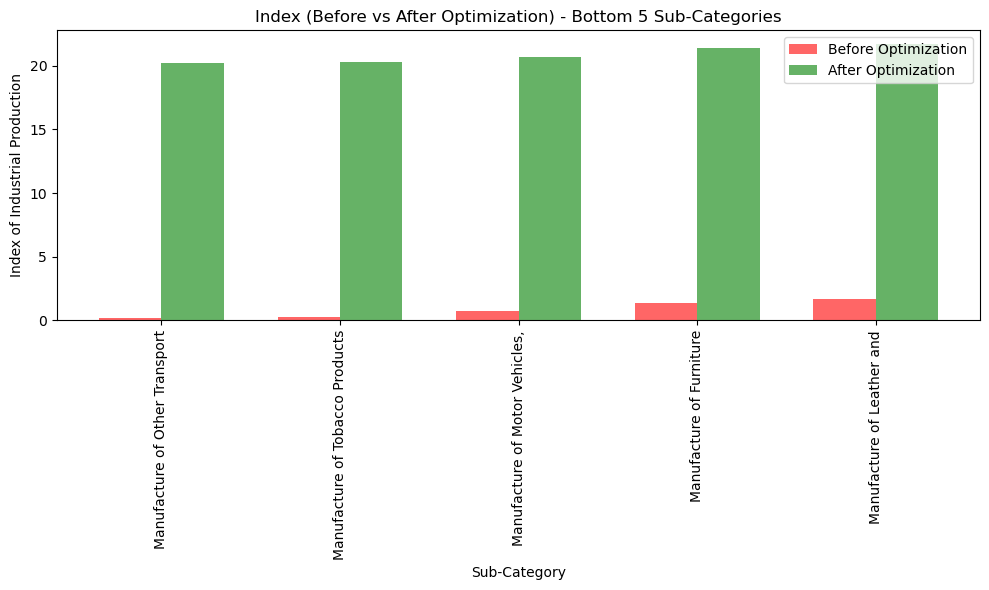

In [48]:
# Cell 7.1 – Index as Side-by-Side Bar Chart
import matplotlib.pyplot as plt
import numpy as np

sub_categories = bottom5_before['sub_category'].apply(lambda x: ' '.join(x.split()[:4]))
index_before = bottom5_before['index']
index_after = bottom5_after['index']

x = np.arange(len(sub_categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, index_before, width, label='Before Optimization', color='red', alpha=0.6)
ax.bar(x + width/2, index_after, width, label='After Optimization', color='green', alpha=0.6)

ax.set_xlabel('Sub-Category')
ax.set_ylabel('Index of Industrial Production')
ax.set_title('Index (Before vs After Optimization) - Bottom 5 Sub-Categories')
ax.set_xticks(x)
ax.set_xticklabels(sub_categories, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

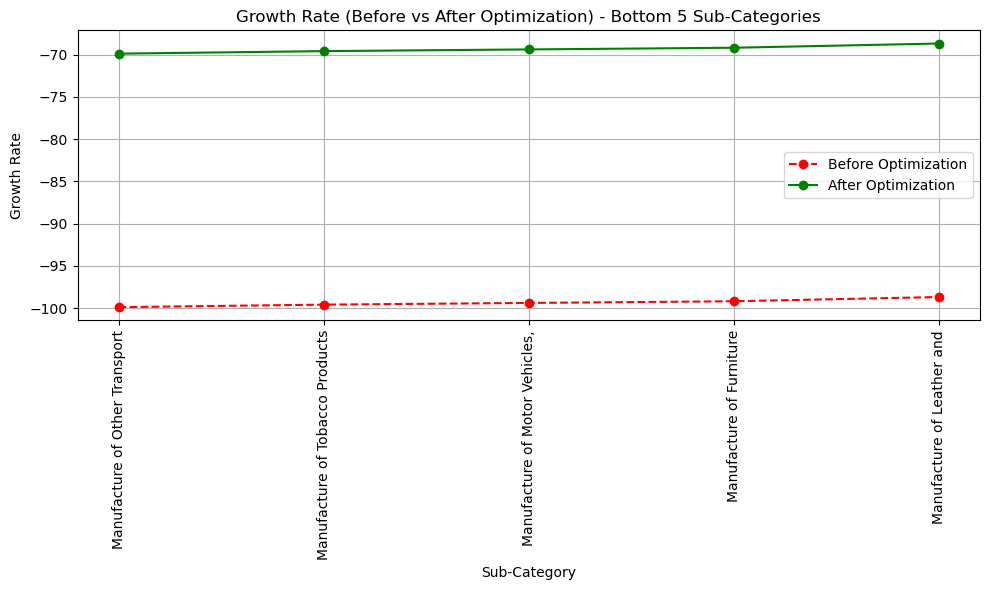

In [49]:
# Cell 7.2 – Growth Rate as Line Chart

sub_categories = bottom5_before['sub_category'].apply(lambda x: ' '.join(x.split()[:4]))
growth_before = bottom5_before['growth_rate']
growth_after = bottom5_after['growth_rate']

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(sub_categories, growth_before, marker='o', linestyle='--', color='red', label='Before Optimization')
ax.plot(sub_categories, growth_after, marker='o', linestyle='-', color='green', label='After Optimization')

ax.set_xlabel('Sub-Category')
ax.set_ylabel('Growth Rate')
ax.set_title('Growth Rate (Before vs After Optimization) - Bottom 5 Sub-Categories')
ax.legend()
ax.grid(True)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [50]:
# Cell 8. Insights after LP-Based Optimization

avg_before_index = bottom5_before["index"].mean()
avg_after_index  = bottom5_after["index"].mean()

avg_before_growth = bottom5_before["growth_rate"].mean()
avg_after_growth  = bottom5_after["growth_rate"].mean()

print("🔍 Insights from LP-Based Bottom 5 Optimization:")
print(f"- Average Index (Bottom 5, Before): {avg_before_index:.2f}")
print(f"- Average Index (Bottom 5, After):  {avg_after_index:.2f}")
print(f"- Average Growth Rate (Bottom 5, Before): {avg_before_growth:.2f}%")
print(f"- Average Growth Rate (Bottom 5, After):  {avg_after_growth:.2f}%")

if avg_after_growth > avg_before_growth:
    print("\n✅ LP optimization successfully improved Growth Rates for the weakest-performing sub-categories.")
else:
    print("\n⚠️ Growth Rate did not improve significantly. Consider adjusting LP constraints or weight in objective.")

🔍 Insights from LP-Based Bottom 5 Optimization:
- Average Index (Bottom 5, Before): 0.86
- Average Index (Bottom 5, After):  20.86
- Average Growth Rate (Bottom 5, Before): -99.36%
- Average Growth Rate (Bottom 5, After):  -69.36%

✅ LP optimization successfully improved Growth Rates for the weakest-performing sub-categories.
